In [2]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt

In [39]:
# Pandas Settings
pd.set_option('display.max_columns', None)

In [3]:
# Import CSV
inital_slice = pd.read_csv('240112_150239_Slice1.csv')
middle_slice = pd.read_csv('240112_150239_Slice397.csv')
final_slice = pd.read_csv('240112_150239_Slice793.csv')

In [58]:
# Merge Databases

def merge(): # Check merging error when plotting data
    half_merged = pd.merge(final_slice, middle_slice, how='right')
    fully_merged = pd.merge(half_merged, inital_slice, how='outer')

    return fully_merged

merged_df = merge()

C:\Users\ianmh\AppData\Local\Temp\ipykernel_28612\2393772343.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  fully_merged = pd.merge(half_merged, inital_slice, how='outer')


In [ ]:
# Clean Up Merged DF

# Tile position can be used for a visualtion in real space but is outside of the scope for this project
merged_df = merged_df.drop(columns = ['TileX', 'TileZ'])

merged_df = merged_df.drop(columns = ['Age']) # Can drop for specific to remove dupes in certine cases, but age can be used for visulizations

merged_df.drop_duplicates(inplace=True) # Takes df from 1430 rows to 109 (the removed data is duplicate "animals" with separate ages and tiles positions)

109


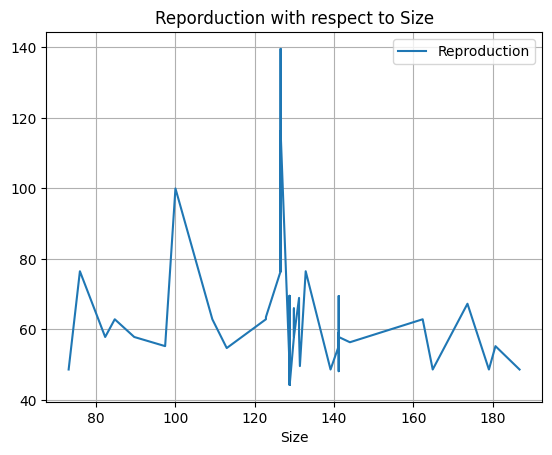

In [ ]:
# Testing and Visualations

print(len(merged_df))

merged_df.head(5)

# Idea 1: Graph (row) based on biome grouping (could be a cluster graph to show multiple biomes)

# Idea 2: Size vs. Reproduction
size_sorted_df = merged_df.sort_values(by=['Size'])

size_sorted_df.plot(x='Size', y='Reproduction', kind='line', title='Reporduction with respect to Size', legend=True)

plt.grid(True)
plt.show()